In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pylab as plt
%matplotlib inline
import fbprophet as fp
import itertools
import statsmodels.api as sm

In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [3]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
import plotly.plotly as ply
import cufflinks as cf

In [5]:
# load the data from csv

df = pd.read_csv('NETWORK_DATA_NA.csv', index_col = 0)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (12,13,14,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
# widen view of the dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
df223 = df[df['Show_Name'] == "SHOW_223"]
df223.head()

,Demo,Year,Qtr,Month,Week,Dow,Date,Show_Name,Start_Time,End_Time,Half_Hr,Genre,Sub_Genre,Sht,Spc,Sus,O_A,Live,Season_num,Episode_num,Epi_order,Finale,Premiere,Premiere_2,Reunion,Casting,Secrets,Social_Edition,Special,SneakPeek,FirstLook,Movie_Indi,Order_Rpt,HH_NT_Daypart,program_type,Show_Duration,Commercial_Duration,Commercial_Impression,Show_Impression
Network,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,2:00:00,3:00:00,2:00:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LateNight,Original_Encores,30,0.0,0.0,52977.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,2:00:00,3:00:00,2:30:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LateNight,Original_Encores,28,0.0,0.0,63786.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,3:00:00,4:00:00,3:00:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LateNight,Original_Encores,29,0.0,0.0,82896.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,3:00:00,4:00:00,3:30:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LateNight,Original_Encores,1,0.0,0.0,97570.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,6:00:00,7:00:00,6:00:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EarlyMorning,Original_Encores,30,0.0,0.0,63046.0


In [8]:
# view dataframe
df.head(20)

,Network,Demo,Year,Qtr,Month,Week,Dow,Date,Show_Name,Start_Time,End_Time,Half_Hr,Genre,Sub_Genre,Sht,Spc,Sus,O_A,Live,Season_num,Episode_num,Epi_order,Finale,Premiere,Premiere_2,Reunion,Casting,Secrets,Social_Edition,Special,SneakPeek,FirstLook,Movie_Indi,Order_Rpt,HH_NT_Daypart,program_type,Show_Duration,Commercial_Duration,Commercial_Impression,Show_Impression
0,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_154,0:00:00,1:00:00,0:00:00,GD,SR,NaN,NaN,N,O,NaN,5,13,0,0,0,0,0,0,0,0,0,0,0,0,2,SalesPrime,Original_Encores,30,240.0,58933.0,61162.0
1,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_154,0:00:00,1:00:00,0:30:00,GD,SR,NaN,NaN,N,O,NaN,5,13,0,0,0,0,0,0,0,0,0,0,0,0,2,SalesPrime,Original_Encores,30,447.0,66555.0,67200.0
2,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_55,1:00:00,2:00:00,1:00:00,GD,SR,NaN,NaN,N,O,NaN,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,SalesPrime,Original_Encores,30,239.0,96015.0,85136.0
3,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_55,1:00:00,2:00:00,1:30:00,GD,SR,NaN,NaN,N,O,NaN,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,SalesPrime,Original_Encores,30,447.0,31708.0,41534.0
4,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_102,2:00:00,3:00:00,2:00:00,GD,SR,NaN,NaN,N,O,NaN,4,4,0,0,0,0,0,0,0,0,0,0,0,0,1,LateNight,Original_Encores,30,238.0,58955.0,61318.0
5,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_102,2:00:00,3:00:00,2:30:00,GD,SR,NaN,NaN,N,O,NaN,4,4,0,0,0,0,0,0,0,0,0,0,0,0,1,LateNight,Original_Encores,30,447.0,44831.0,61362.0
6,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_52,3:00:00,4:00:00,3:00:00,GD,SR,NaN,NaN,N,O,NaN,5,7,0,0,0,0,0,0,0,0,0,0,0,0,1,LateNight,Original_Encores,30,238.0,48616.0,53012.0
7,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_52,3:00:00,4:00:00,3:30:00,GD,SR,NaN,NaN,N,O,NaN,5,7,0,0,0,0,0,0,0,0,0,0,0,0,1,LateNight,Original_Encores,30,420.0,42004.0,47329.0
8,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_186,6:00:00,7:00:00,6:00:00,GD,SR,NaN,NaN,N,O,NaN,9,8,0,0,0,0,0,0,0,0,0,0,0,0,1,EarlyMorning,Original_Encores,30,237.0,70009.0,83002.0
9,XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Mon,2012-08-27,SHOW_186,6:00:00,7:00:00,6:30:00,GD,SR,NaN,NaN,N,O,NaN,9,8,0,0,0,0,0,0,0,0,0,0,0,0,1,EarlyMorning,Original_Encores,30,447.0,40683.0,62477.0


In [8]:
df.shape

(148381, 39)

In [ ]:
df.groupby('Show_Name')['']

In [9]:
df.groupby('Show_Name')['Show_Impression'].mean().sort_values(ascending = False)

Show_Name
SHOW_17     560790.400000
SHOW_135    320083.500000
SHOW_168    229705.000000
SHOW_117    227992.535714
SHOW_85     221040.000000
SHOW_137    215005.886905
SHOW_134    208086.036370
SHOW_138    202270.500000
SHOW_18     198897.050000
SHOW_25     197340.345538
SHOW_62     196007.931507
SHOW_108    192782.359712
SHOW_182    191780.328671
SHOW_150    184112.662639
SHOW_1      183827.000000
SHOW_189    183504.250000
SHOW_141    183345.245592
SHOW_220    174019.041958
SHOW_142    165695.250000
SHOW_74     164933.531532
SHOW_164    164245.832012
SHOW_23     163824.000000
SHOW_207    163720.842068
SHOW_193    163026.132246
SHOW_105    162494.901639
SHOW_55     159142.670732
SHOW_143    158418.675304
SHOW_151    158403.377421
SHOW_100    156328.181818
SHOW_177    155906.883117
SHOW_95     152705.870748
SHOW_66     149933.854271
SHOW_21     149890.375000
SHOW_102    149613.490148
SHOW_136    149247.827869
SHOW_156    149077.000000
SHOW_78     148547.709459
SHOW_42     147823.189189
SH

In [10]:
a = df.groupby('Show_Name')['Show_Impression']

In [11]:
a.describe()

,count,mean,std,min,25%,50%,75%,max
Show_Name,,,,,,,,
SHOW_1,8.0,183827.000000,92233.824073,56099.0,131037.25,161401.5,224644.00,318551.0
SHOW_10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHOW_100,11.0,156328.181818,54295.257566,71242.0,119723.50,146800.0,211522.00,225191.0
SHOW_101,111.0,127534.216216,71615.195481,14054.0,76872.50,114551.0,161367.50,357954.0
SHOW_102,2436.0,149613.490148,119312.564881,3563.0,77244.50,124542.5,188507.50,1975484.0
SHOW_103,13.0,125172.769231,59019.873077,39294.0,77645.00,110371.0,185264.00,208371.0
SHOW_104,130.0,87173.146154,48355.156285,14099.0,49997.25,80540.0,115097.75,269208.0
SHOW_105,61.0,162494.901639,90831.400998,33042.0,99241.00,147653.0,214129.00,631066.0
SHOW_106,96.0,79540.750000,42686.112671,16005.0,45575.25,70560.0,110220.25,241331.0


In [12]:
# column names

df.columns

Index(['Demo', 'Year', 'Qtr', 'Month', 'Week', 'Dow', 'Date', 'Show_Name', 'Start_Time', 'End_Time', 'Half_Hr', 'Genre', 'Sub_Genre', 'Sht', 'Spc', 'Sus', 'O_A', 'Live', 'Season_num', 'Episode_num', 'Epi_order', 'Finale', 'Premiere', 'Premiere_2', 'Reunion', 'Casting', 'Secrets', 'Social_Edition', 'Special', 'SneakPeek', 'FirstLook', 'Movie_Indi', 'Order_Rpt', 'HH_NT_Daypart', 'program_type', 'Show_Duration', 'Commercial_Duration', 'Commercial_Impression', 'Show_Impression'], dtype='object')

In [13]:
# understand data
# neilson data
# predict eithter commercial / show impression

In [14]:
# pandas profiling reportrt of the data

pp.ProfileReport(df)

Number of variables,40
Number of observations,148381
Total Missing (%),10.1%
Total size in memory,45.3 MiB
Average record size in memory,320.0 B
Numeric,8
Categorical,18
Boolean,8
Date,0
Text (Unique),0
Rejected,6


In [15]:
df.Genre.unique()

array(['GD', 'GV', 'FF', 'CC', 'CV', 'N', 'DO', 'U', 'CS', 'DN', 'DD',
       nan], dtype=object)

In [16]:
# df.Show_Name.value_counts(ascending = False)

In [17]:
# df.Date

In [18]:
#convert to a datatime column
# df.Date = df.Date.apply(lambda x: x.decode('utf-8'))
# df.Date = pd.to_datetime(df.Date)

In [19]:
# df.set_index('Date')

SHOW_223    22562
SHOW_222    17102
SHOW_134    11521
SHOW_143     8569
SHOW_141     6935
SHOW_207     6272
SHOW_154     6030
SHOW_151     5279
SHOW_218     5048
SHOW_12      4716
SHOW_96      3688
SHOW_164     3623
SHOW_94      3095
SHOW_186     2936
SHOW_169     2813
SHOW_91      2764
SHOW_13      2635
SHOW_102     2436
SHOW_38      2090
SHOW_52      1692
SHOW_157     1692
SHOW_146     1165
SHOW_150     1076
SHOW_181     1065
SHOW_180      928
SHOW_114      870
SHOW_109      795
SHOW_79       712
SHOW_58       681
SHOW_65       600
SHOW_193      552
SHOW_111      520
SHOW_178      500
SHOW_25       437
SHOW_90       431
SHOW_118      391
SHOW_62       365
SHOW_191      343
SHOW_137      336
SHOW_149      331
SHOW_163      292
SHOW_204      289
SHOW_47       282
SHOW_183      279
SHOW_170      270
SHOW_171      261
SHOW_192      258
SHOW_213      257
SHOW_63       252
SHOW_179      240
SHOW_123      235
SHOW_73       205
SHOW_66       199
SHOW_37       195
SHOW_54       191
SHOW_195  

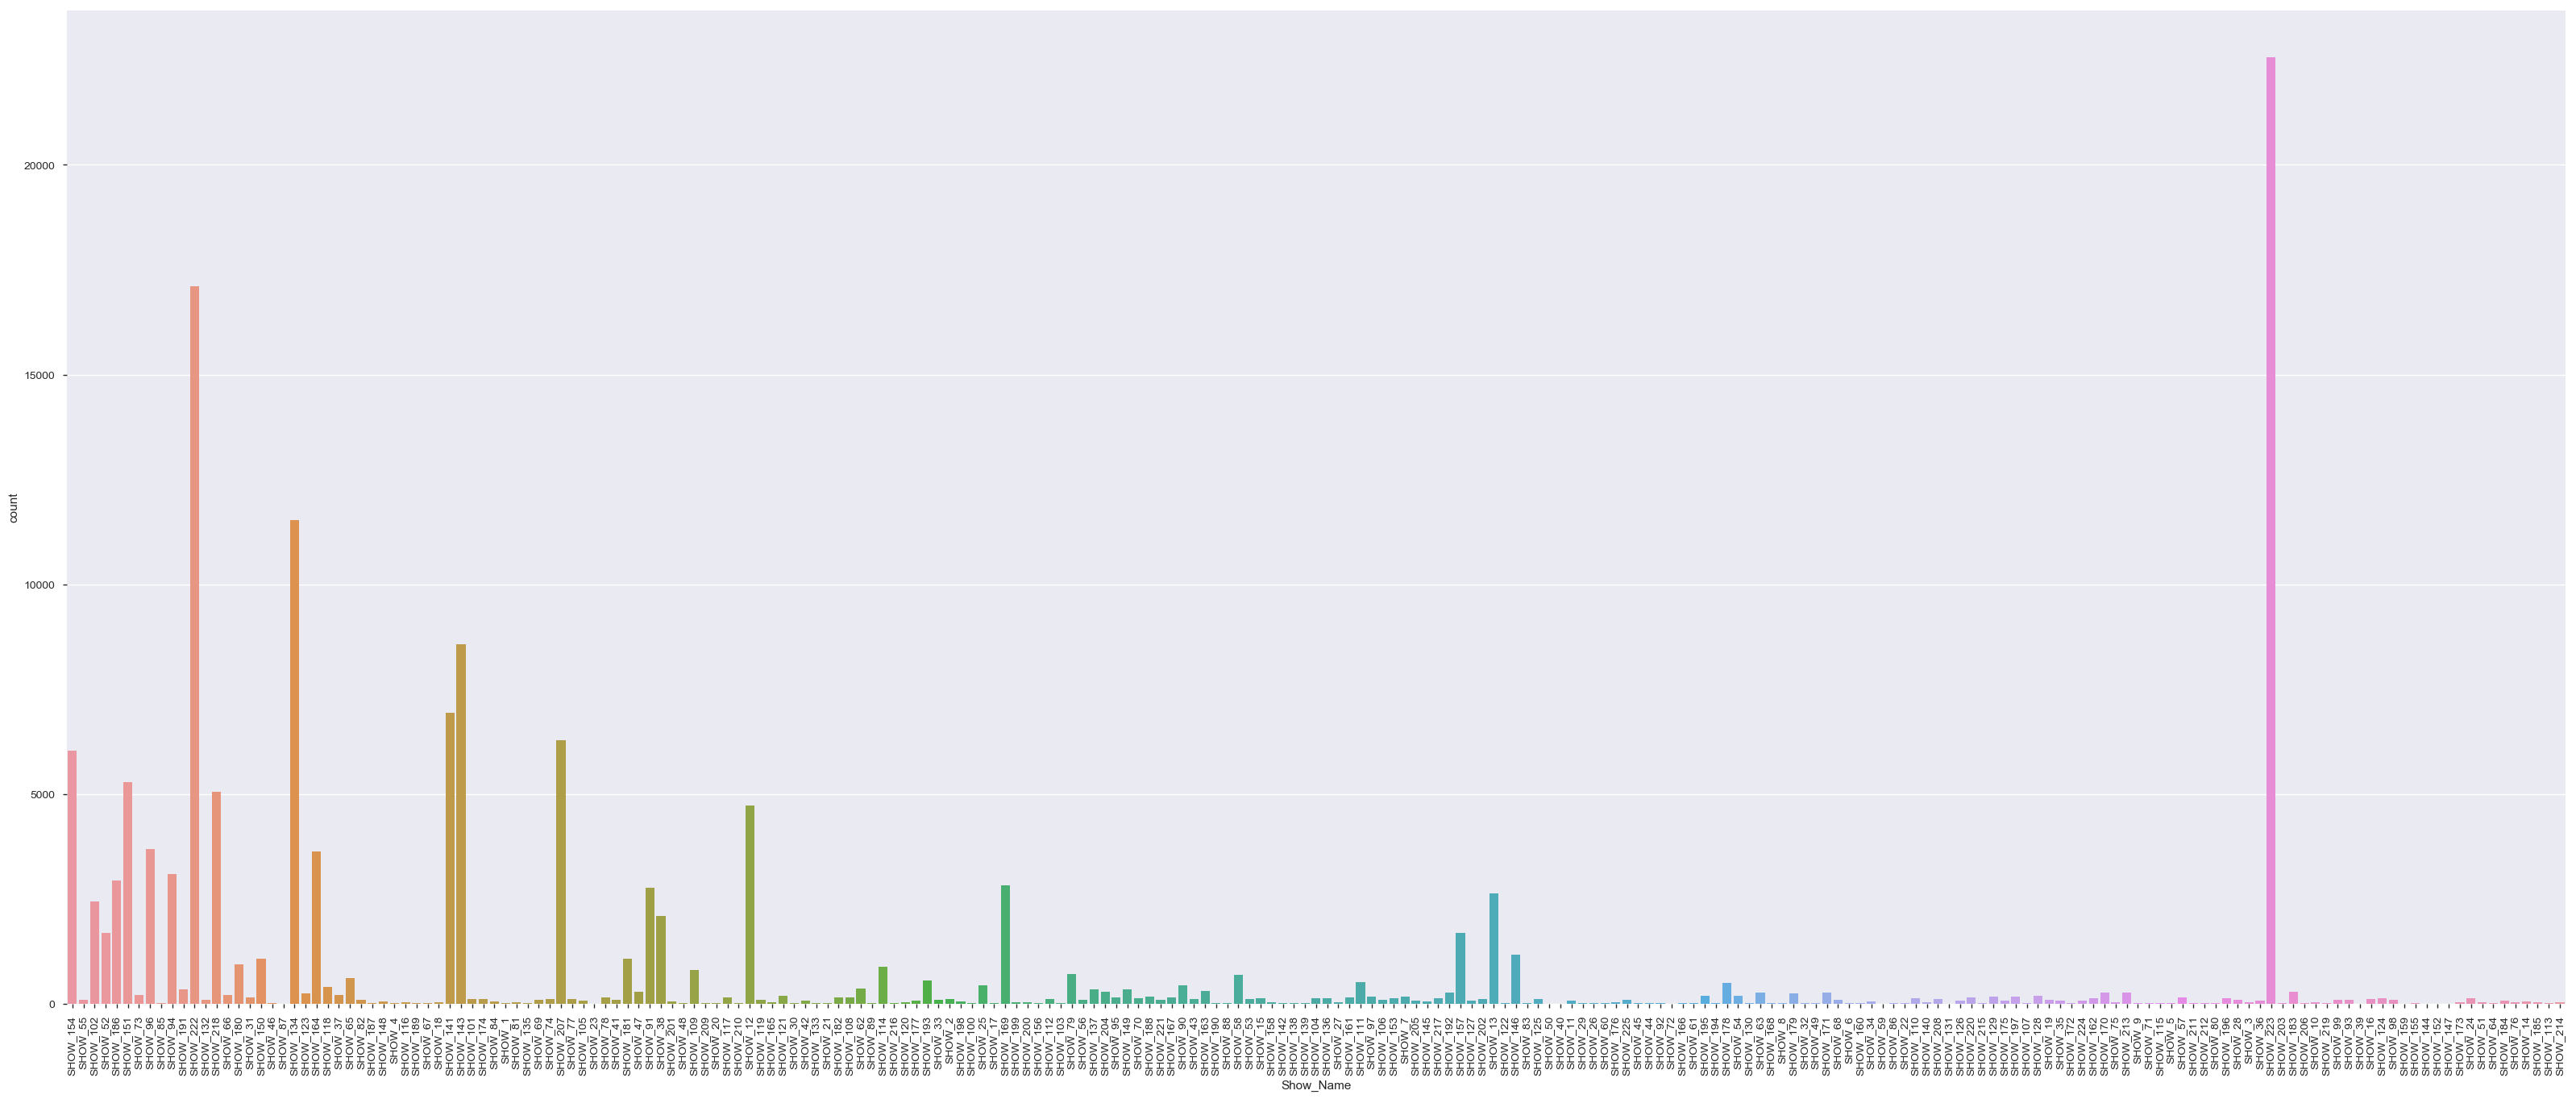

In [20]:
# show Name Visualisations
print(df['Show_Name'].value_counts())
plt.figure(figsize=(40,16))
sns.countplot(df['Show_Name'])
plt.xticks(rotation=90)
plt.show()

SHOW_223    22562
SHOW_222    17102
SHOW_134    11521
SHOW_143     8569
SHOW_141     6935
SHOW_207     6272
SHOW_154     6030
SHOW_151     5279
SHOW_218     5048
SHOW_12      4716
Name: Show_Name, dtype: int64


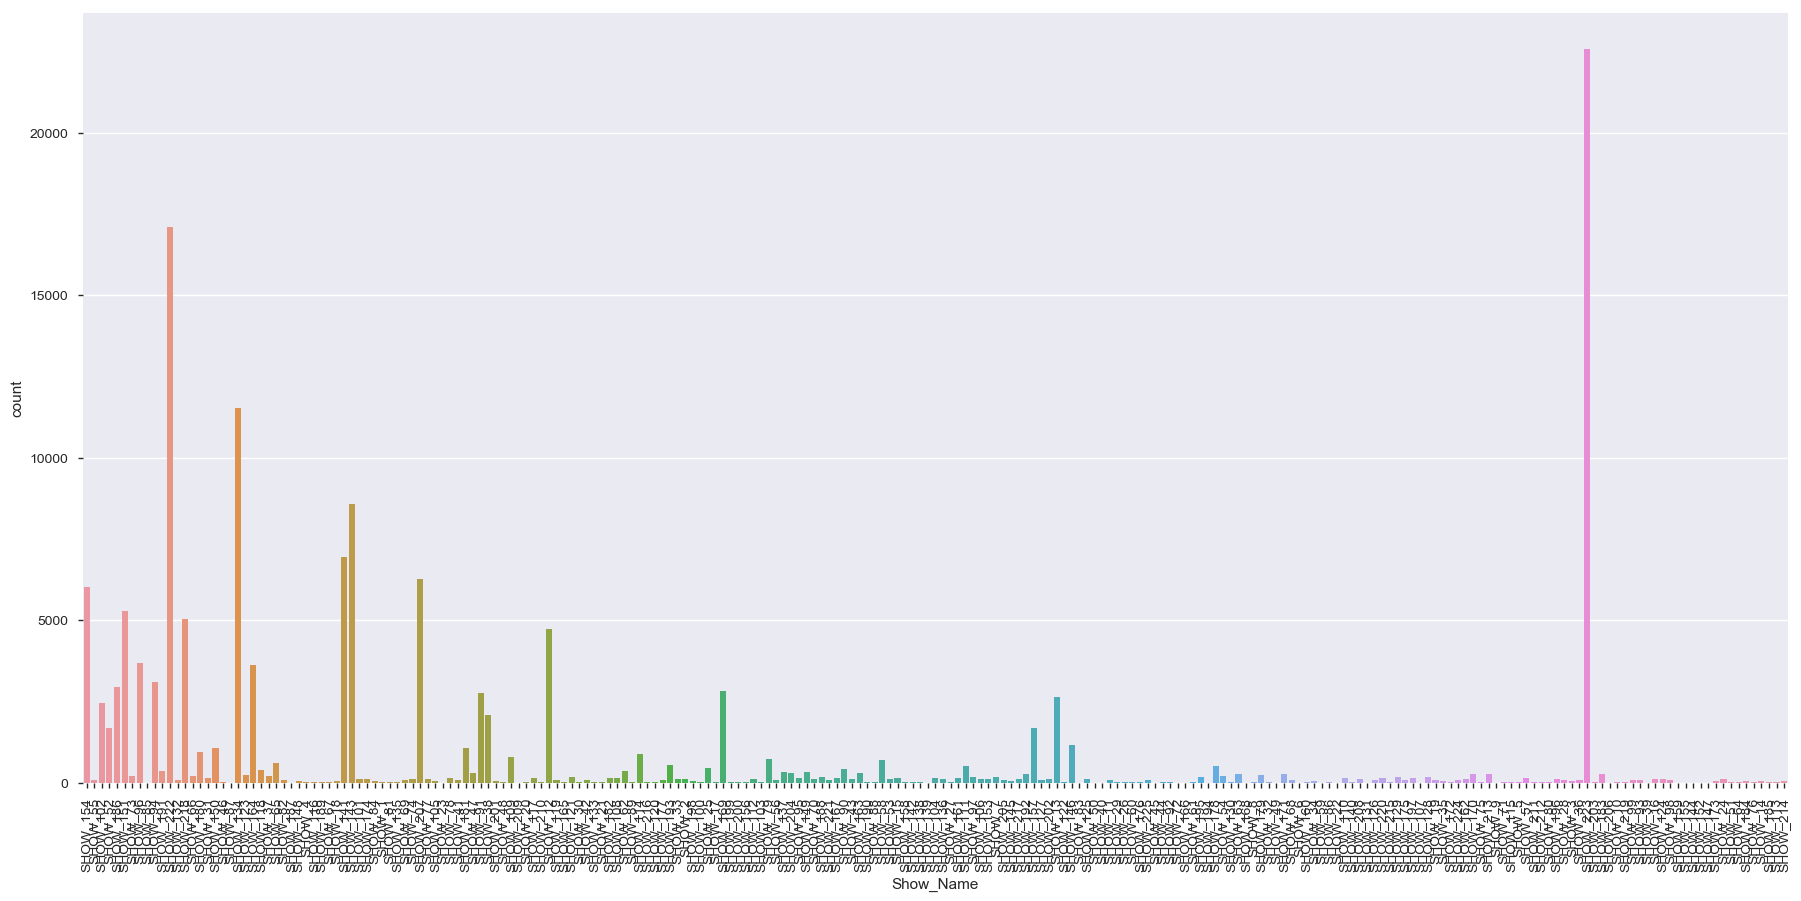

In [21]:
# Top target shows
print(df['Show_Name'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(df['Show_Name'])
plt.xticks(rotation=90)
plt.show()


In [22]:
df223.head(100)

,Demo,Year,Qtr,Month,Week,Dow,Date,Show_Name,Start_Time,End_Time,Half_Hr,Genre,Sub_Genre,Sht,Spc,Sus,O_A,Live,Season_num,Episode_num,Epi_order,Finale,Premiere,Premiere_2,Reunion,Casting,Secrets,Social_Edition,Special,SneakPeek,FirstLook,Movie_Indi,Order_Rpt,HH_NT_Daypart,program_type,Show_Duration,Commercial_Duration,Commercial_Impression,Show_Impression
Network,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,2:00:00,3:00:00,2:00:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LateNight,Original_Encores,30,0.0,0.0,52977.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,2:00:00,3:00:00,2:30:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LateNight,Original_Encores,28,0.0,0.0,63786.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,3:00:00,4:00:00,3:00:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LateNight,Original_Encores,29,0.0,0.0,82896.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,3:00:00,4:00:00,3:30:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LateNight,Original_Encores,1,0.0,0.0,97570.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,6:00:00,7:00:00,6:00:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EarlyMorning,Original_Encores,30,0.0,0.0,63046.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,6:00:00,7:00:00,6:30:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EarlyMorning,Original_Encores,30,0.0,0.0,74613.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,7:00:00,8:00:00,7:00:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EarlyMorning,Original_Encores,2,0.0,0.0,81969.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,7:00:00,8:00:00,7:30:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,EarlyMorning,Original_Encores,30,0.0,0.0,89694.0
XYZ,Adult 18-49,2018,4Q,Dec,12/3/2018,Mon,12/3/2018,SHOW_223,8:00:00,9:00:00,8:00:00,NaN,NaN,NaN,NaN,NaN,O,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Weekday,Original_Encores,30,0.0,0.0,92910.0


In [23]:
df223.shape

(22562, 39)

In [24]:
#convert to date to datetime object
df223.Date = pd.to_datetime(df223.Date)

In [25]:
df223.Show_Impression.mean()

95967.81666666667

In [26]:
import plotly.graph_objs as go
S_223 = [go.Scatter(x=df223.Date, y=df223.Show_Impression)]

In [27]:
ply.iplot(S_223)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [28]:
df17 = df[df['Show_Name'] == "SHOW_17"]


In [29]:
df17.head()

,Demo,Year,Qtr,Month,Week,Dow,Date,Show_Name,Start_Time,End_Time,Half_Hr,Genre,Sub_Genre,Sht,Spc,Sus,O_A,Live,Season_num,Episode_num,Epi_order,Finale,Premiere,Premiere_2,Reunion,Casting,Secrets,Social_Edition,Special,SneakPeek,FirstLook,Movie_Indi,Order_Rpt,HH_NT_Daypart,program_type,Show_Duration,Commercial_Duration,Commercial_Impression,Show_Impression
Network,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XYZ,Adult 18-49,2014,1Q,Feb,1/27/2014,Mon,1/27/2014,SHOW_17,18:00:00,19:00:00,18:00:00,GV,GV,NaN,NaN,N,A,NaN,10,14,0,0,0,0,0,0,0,0,0,0,0,0,1,Access,Original_Premieres,30,431.0,1111659.0,1202262.0
XYZ,Adult 18-49,2014,1Q,Feb,1/27/2014,Mon,1/27/2014,SHOW_17,18:00:00,19:00:00,18:30:00,GV,GV,NaN,NaN,N,A,NaN,10,14,0,0,0,0,0,0,0,0,0,0,0,0,1,Access,Original_Encores,30,270.0,638534.0,734041.0
XYZ,Adult 18-49,2014,1Q,Feb,1/27/2014,Tue,1/28/2014,SHOW_17,18:00:00,19:00:00,18:00:00,GV,GV,NaN,NaN,N,A,NaN,10,79,0,0,0,0,0,0,0,0,0,0,0,0,1,Access,Original_Premieres,30,448.0,746425.0,826752.0
XYZ,Adult 18-49,2014,1Q,Feb,1/27/2014,Tue,1/28/2014,SHOW_17,18:00:00,19:00:00,18:30:00,GV,GV,NaN,NaN,N,A,NaN,10,79,0,0,0,0,0,0,0,0,0,0,0,0,1,Access,Original_Premieres,30,269.0,349594.0,357818.0
XYZ,Adult 18-49,2014,1Q,Feb,1/27/2014,Wed,1/29/2014,SHOW_17,18:00:00,19:00:00,18:00:00,GV,GV,NaN,NaN,N,A,NaN,10,43,0,0,0,0,0,0,0,0,0,0,0,0,1,Access,Original_Encores,30,450.0,323410.0,344078.0


In [145]:
df17.shape

(10, 39)

In [30]:
S_17 = [go.Scatter(x=df17.Date, y=df17.Show_Impression)]

In [31]:
ply.iplot(S_17)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [32]:
df17.shape

(10, 39)

In [33]:
df222 = df[df['Show_Name'] == "SHOW_222"]

In [160]:
df222.head(100)

,Demo,Year,Qtr,Month,Week,Dow,Date,Show_Name,Start_Time,End_Time,Half_Hr,Genre,Sub_Genre,Sht,Spc,Sus,O_A,Live,Season_num,Episode_num,Epi_order,Finale,Premiere,Premiere_2,Reunion,Casting,Secrets,Social_Edition,Special,SneakPeek,FirstLook,Movie_Indi,Order_Rpt,HH_NT_Daypart,program_type,Show_Duration,Commercial_Duration,Commercial_Impression,Show_Impression
Network,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,1:03:00,3:30:00,1:00:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,SalesPrime,Original_Encores,30,344.0,44358.0,48554.0
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,1:03:00,3:30:00,1:30:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,SalesPrime,Movies,30,179.0,41944.0,46137.0
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,1:03:00,3:30:00,2:00:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,LateNight,Movies,30,371.0,44334.0,49687.0
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,1:03:00,3:30:00,2:30:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,LateNight,Movies,30,412.0,47381.0,51204.0
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,1:03:00,3:30:00,3:00:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,LateNight,Movies,30,365.0,57171.0,54948.0
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,6:30:00,9:00:00,6:30:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,EarlyMorning,Original_Encores,30,418.0,49574.0,51214.0
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,6:30:00,9:00:00,7:00:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,EarlyMorning,Original_Encores,30,268.0,65441.0,63498.0
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,6:30:00,9:00:00,7:30:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,EarlyMorning,Original_Encores,30,387.0,70646.0,78904.0
XYZ,Adult 18-49,2012,3Q,Sep,8/27/2012,Thu,8/30/2012,SHOW_222,6:30:00,9:00:00,8:00:00,FF,FF,NaN,NaN,N,V,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Weekday,Original_Encores,30,239.0,93436.0,105598.0


In [35]:
df_222 = df222[['Date', 'Commercial_Impression', 'Show_Impression']]

In [36]:
df_222.head()

,Date,Commercial_Impression,Show_Impression
Network,,,
XYZ,8/30/2012,44358.0,48554.0
XYZ,8/30/2012,41944.0,46137.0
XYZ,8/30/2012,44334.0,49687.0
XYZ,8/30/2012,47381.0,51204.0
XYZ,8/30/2012,57171.0,54948.0


In [37]:
df_222.index

Index(['XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ',
       ...
       'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ', 'XYZ'], dtype='object', name='Network', length=17102)

In [38]:
df_222.set_index('Date', inplace=True)

In [39]:
df_222.head()

,Commercial_Impression,Show_Impression
Date,,
8/30/2012,44358.0,48554.0
8/30/2012,41944.0,46137.0
8/30/2012,44334.0,49687.0
8/30/2012,47381.0,51204.0
8/30/2012,57171.0,54948.0


In [143]:
S_222 = [go.Scatter(x=df_222.index, y=df_222.Show_Impression)]

In [144]:
ply.iplot(S_222)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [44]:
df_222.Show_Impression.mean()

128681.27524013544

In [45]:
#  setting up time series model for the show 222
def StartARIMAForecasting (Actual, P, D, Q):
    model = ARIMA(Actual, order(P,D,Q))
    model.fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [46]:
NumberOfElements = len(df_222)

In [47]:
#Use 70% of data as training, rest 30% to Test model 
TrainingSize = int(NumberOfElements * 0.7)     # I want to randomize it
TrainingData = df_222[0:TrainingSize]
TestData = df_222[TrainingSize:NumberOfElements]

In [48]:
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

In [49]:
Actual

['Commercial_Impression', 'Show_Impression']

In [50]:
TestData.head()

,Commercial_Impression,Show_Impression
Date,,
3/10/2018,130115.0,135470.0
3/10/2018,160924.0,160950.0
3/10/2018,168632.0,178575.0
3/10/2018,0.0,199749.0
3/10/2018,0.0,188891.0


In [147]:
# # predict values using ARIMA model

# ActualValue =  TestData.loc[ : , ['Show_Impression'] ]
# #forcast value
# Prediction = StartARIMAForecasting(Actual, 3,1,0)    
# print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
# #add it in the list
# Predictions.append(Prediction)
# Actual.append(ActualValue)

In [52]:
# #Print MSE to see how good the model is
# Error = mean_squared_error(TestData, Predictions)
# print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# # plot
# pyplot.plot(TestData)
# pyplot.plot(Predictions, color='red')
# pyplot.show()

In [149]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
#     orig = plt.subplot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [150]:
df222_1 = df222.loc[:, ['Date', 'Show_Impression']]
df222_1.head()

,Date,Show_Impression
Network,,
XYZ,8/30/2012,48554.0
XYZ,8/30/2012,46137.0
XYZ,8/30/2012,49687.0
XYZ,8/30/2012,51204.0
XYZ,8/30/2012,54948.0


In [55]:
# df222_1.set_index(df222_1['Date'], inplace=True)
# df222_1.drop(['Date'], axis=1, inplace=True)
# df222_1 = df222_1.asfreq('W-SAT')



In [56]:
df222_1.set_index('Date', inplace= True)

In [57]:
# df222_1 = df222_1.asfreq('W-SAT')

In [58]:
# df222_1.head()

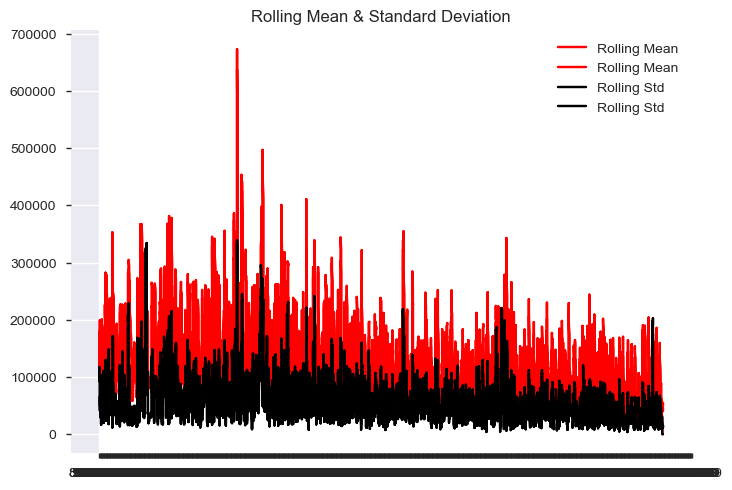

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [151]:
 test_stationarity(df_222)

In [60]:
# SARIMAX TRIAL 1

In [61]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [62]:
pdqs

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [64]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df222_1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =387370.0876033128


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =382824.5374685969


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =380087.6034129637


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =371105.65637432656


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =377475.79212810117


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =370876.1518842287


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =374679.4098000696


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =369852.4237819748


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =377237.13878056617


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =375728.7370739487


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =370775.9716273097


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =365606.49419003935


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =374920.30568864796


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =373367.9866406772


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =367830.71005686704


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =365591.6654406469


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =354274.2525760451


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =353754.8173279837


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =364296.97280553414


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =353953.62427851785


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =353781.0005843538


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =353755.393554869


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =359339.34420816746


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =353932.372893144


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =354038.335045637


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =353731.8310264562


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =364055.7780590813


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =356424.59562505945


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =353782.3726076971


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =353732.41465718165


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =359965.6721975673


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =356422.85289381875


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =353713.0410057847


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =353414.43109271344


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =362837.4844541759


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =355245.4332531504


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =353414.42830950546


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =352676.91398520785


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =358668.1985432187


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =355241.34483518096


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =353685.18910759


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =353384.82132676465


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =362671.5991355262


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =355109.57882456935


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =353410.12265991804


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =352570.48684160475


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =358544.9658392621


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =355106.38635522453


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =354061.85652851657


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =353756.2562479227


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =364080.6491843853


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =356448.27679987956


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =353756.1195069318


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =353756.83900298213


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =359940.58309839596


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =356446.55959795095


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =352774.81981892826


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =352467.05926840845


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =362886.4672070223


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =355837.6829190526


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =352490.57108636515


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =352471.6819726501


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =359052.4977568479


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =355835.21231889783


In [67]:
# fb prophet analysis stage 1

In [70]:
# change column names for the prophet
df222_1 = df222_1.rename(columns = {'Date' : 'ds', 'Show_Impression' : 'y'})
# put a 100,000 views 
df222_1['y'] = df222_1['y'] / 100000

In [71]:
df222_1.head()

,ds,y
Network,,
XYZ,8/30/2012,0.48554
XYZ,8/30/2012,0.46137
XYZ,8/30/2012,0.49687
XYZ,8/30/2012,0.51204
XYZ,8/30/2012,0.54948


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


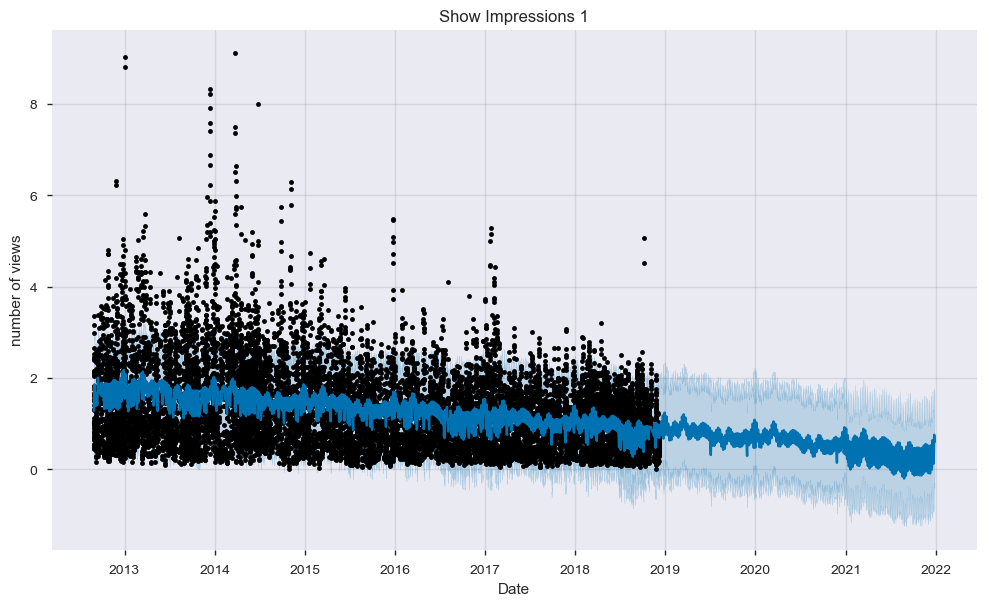

In [102]:
# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
show222_prophet1 = fp.Prophet(changepoint_prior_scale=0.001)
show222_prophet1.fit(df222_1)

# make future dataframe for one year
show222_forecast1 = show222_prophet1.make_future_dataframe(periods = 365)
# make predictions
show222_forecast1 = show222_prophet1.predict(show222_forecast1)

# plot 
show222_prophet1.plot(show222_forecast1, xlabel = 'Date', ylabel = 'number of views')
plt.title('Show Impressions 1');

In [103]:
# the black dots represent the actual values
# the blue lines indicates the forecast values
# the light blue shaded region indicates the unertainty
#  the region of uncertainty is quite unpredictable now, with a gradual decrease in the overall views in the future.
#  so they should just end the show in the near future.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


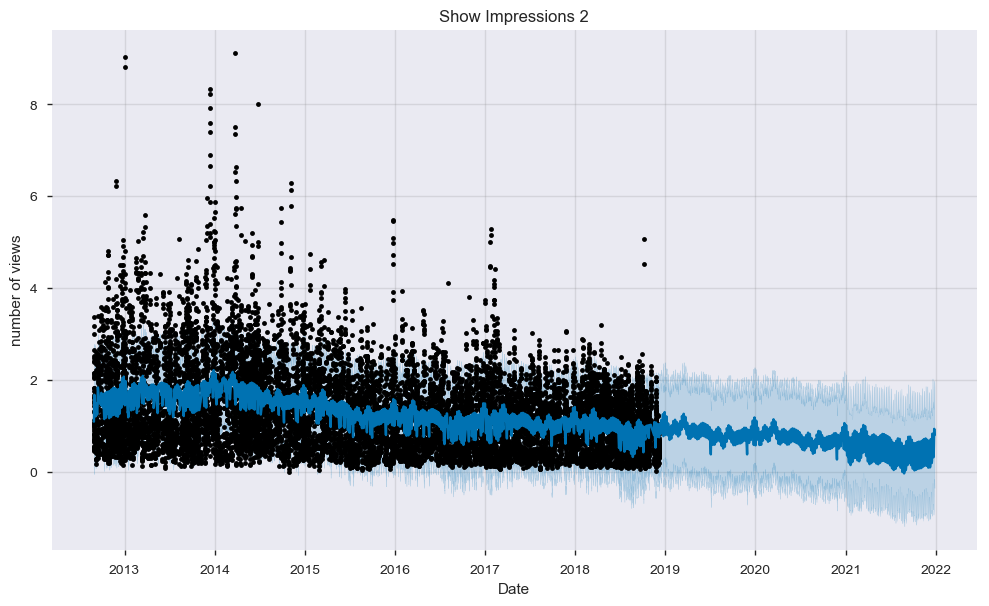

In [104]:
show222_prophet2 = fp.Prophet(changepoint_prior_scale=0.05)
show222_prophet2.fit(df222_1)

# make future dataframe for one year
show222_forecast2 = show222_prophet2.make_future_dataframe(periods = 365)
# make predictions
show222_forecast2 = show222_prophet2.predict(show222_forecast2)

# plot 
show222_prophet2.plot(show222_forecast2, xlabel = 'Date', ylabel = 'number of views')
plt.title('Show Impressions 2');

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


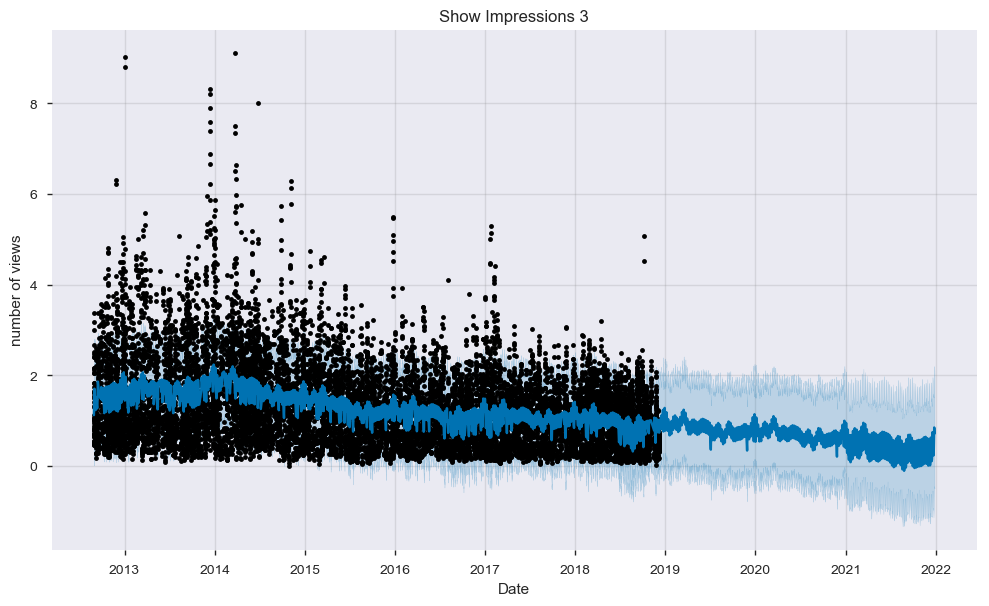

In [105]:
show222_prophet3 = fp.Prophet(changepoint_prior_scale=0.1)
show222_prophet3.fit(df222_1)

# make future dataframe for one year
show222_forecast3 = show222_prophet3.make_future_dataframe(periods = 365)
# make predictions
show222_forecast3 = show222_prophet3.predict(show222_forecast3)

# plot 
show222_prophet3.plot(show222_forecast3, xlabel = 'Date', ylabel = 'number of views')
plt.title('Show Impressions 3');

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


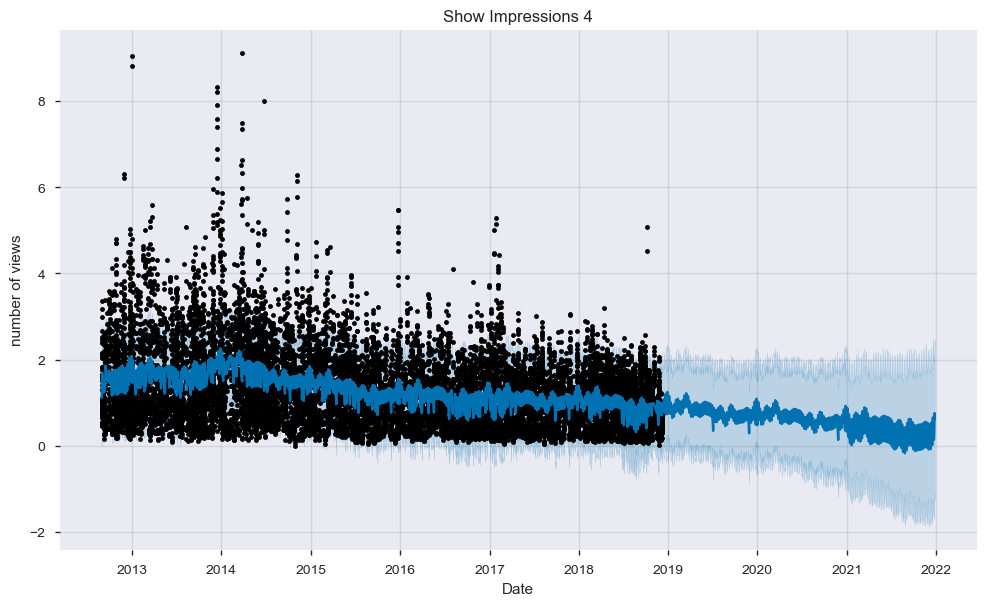

In [106]:
show222_prophet4 = fp.Prophet(changepoint_prior_scale=0.25)
show222_prophet4.fit(df222_1)

# make future dataframe for one year
show222_forecast4 = show222_prophet4.make_future_dataframe(periods = 365)
# make predictions
show222_forecast4 = show222_prophet4.predict(show222_forecast4)

# plot 
show222_prophet4.plot(show222_forecast4, xlabel = 'Date', ylabel = 'number of views')
plt.title('Show Impressions 4');

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


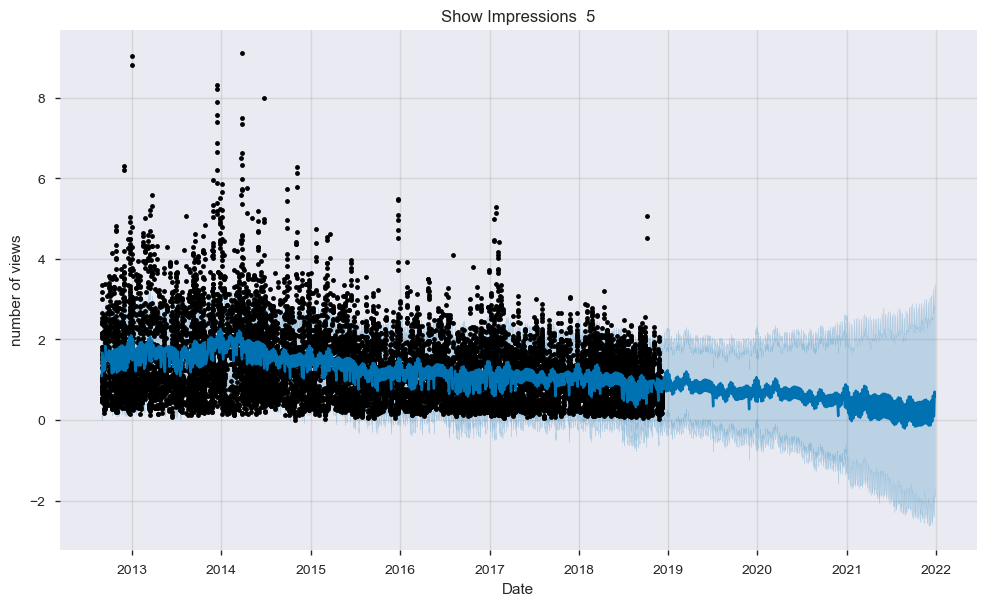

In [107]:
show222_prophet5 = fp.Prophet(changepoint_prior_scale=0.5)
show222_prophet5.fit(df222_1)

# make future dataframe for one year
show222_forecast5 = show222_prophet5.make_future_dataframe(periods = 365)
# make predictions
show222_forecast5 = show222_prophet5.predict(show222_forecast5)

# plot 
show222_prophet5.plot(show222_forecast5, xlabel = 'Date', ylabel = 'number of views')
plt.title('Show Impressions  5');

In [111]:
show_222_names1 = ['show_222_%s' % column for column in show222_forecast1.columns]

In [114]:
show_222_names1

['show_222_ds',
 'show_222_trend',
 'show_222_yhat_lower',
 'show_222_yhat_upper',
 'show_222_trend_lower',
 'show_222_trend_upper',
 'show_222_additive_terms',
 'show_222_additive_terms_lower',
 'show_222_additive_terms_upper',
 'show_222_weekly',
 'show_222_weekly_lower',
 'show_222_weekly_upper',
 'show_222_yearly',
 'show_222_yearly_lower',
 'show_222_yearly_upper',
 'show_222_multiplicative_terms',
 'show_222_multiplicative_terms_lower',
 'show_222_multiplicative_terms_upper',
 'show_222_yhat']

In [115]:
#  convert the forecast to df
convert_show222_forecast = show222_forecast1.copy()

In [116]:
# rename columns
convert_show222_forecast.columns = show_222_names1

In [126]:
forecast1 = convert_show222_forecast

In [129]:
forecast1.columns

Index(['show_222_ds', 'show_222_trend', 'show_222_yhat_lower', 'show_222_yhat_upper', 'show_222_trend_lower', 'show_222_trend_upper', 'show_222_additive_terms', 'show_222_additive_terms_lower', 'show_222_additive_terms_upper', 'show_222_weekly', 'show_222_weekly_lower', 'show_222_weekly_upper', 'show_222_yearly', 'show_222_yearly_lower', 'show_222_yearly_upper', 'show_222_multiplicative_terms', 'show_222_multiplicative_terms_lower', 'show_222_multiplicative_terms_upper', 'show_222_yhat'], dtype='object')

In [130]:
forecast1 = forecast1.rename({'show_222_ds' : 'Date'})

In [134]:
forecast1.head(100)

,show_222_ds,show_222_trend,show_222_yhat_lower,show_222_yhat_upper,show_222_trend_lower,show_222_trend_upper,show_222_additive_terms,show_222_additive_terms_lower,show_222_additive_terms_upper,show_222_weekly,show_222_weekly_lower,show_222_weekly_upper,show_222_yearly,show_222_yearly_lower,show_222_yearly_upper,show_222_multiplicative_terms,show_222_multiplicative_terms_lower,show_222_multiplicative_terms_upper,show_222_yhat
0,2012-08-30,1.618343,0.209293,2.227552,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
1,2012-08-30,1.618343,0.315733,2.290550,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
2,2012-08-30,1.618343,0.170154,2.393190,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
3,2012-08-30,1.618343,0.367324,2.369556,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
4,2012-08-30,1.618343,0.208429,2.318425,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
5,2012-08-30,1.618343,0.189820,2.273291,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
6,2012-08-30,1.618343,0.236958,2.332915,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
7,2012-08-30,1.618343,0.303046,2.348041,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
8,2012-08-30,1.618343,0.243645,2.395616,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582
9,2012-08-30,1.618343,0.231395,2.369478,1.618343,1.618343,-0.334761,-0.334761,-0.334761,-0.180067,-0.180067,-0.180067,-0.154694,-0.154694,-0.154694,0.0,0.0,0.0,1.283582


In [132]:
# # Rename date column
# forecast1 = convert_show222_forecast.rename(columns={'show_222_ds': 'Date'}).drop('show_222_ds', axis=1)
# forecast1.head()

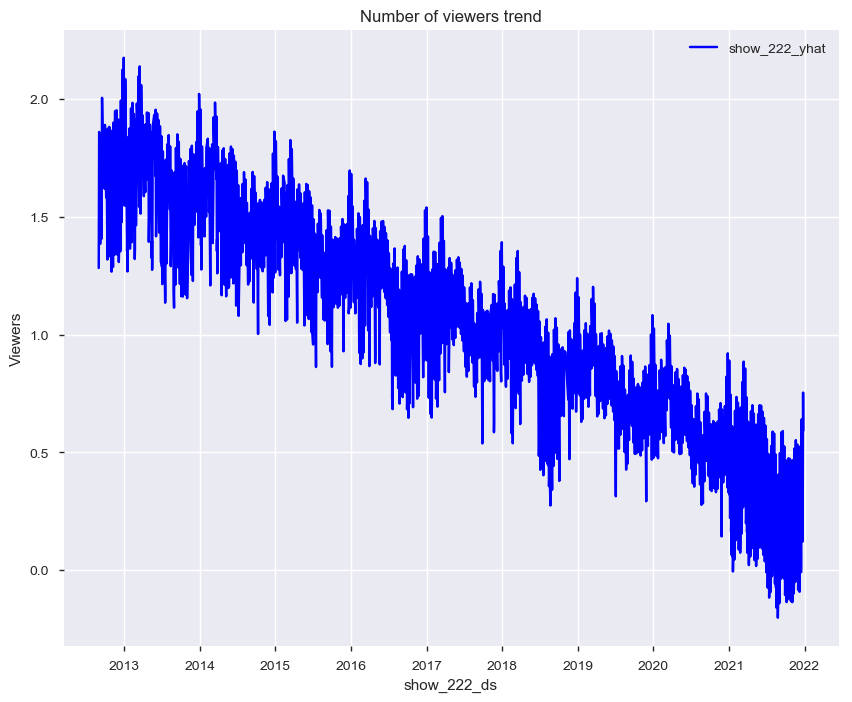

In [136]:
plt.figure(figsize=(10, 8))
plt.plot(forecast1['show_222_ds'], forecast1['show_222_yhat'], 'b-')
plt.legend(); plt.xlabel('show_222_ds'); plt.ylabel('Viewers')
plt.title('Number of viewers trend');

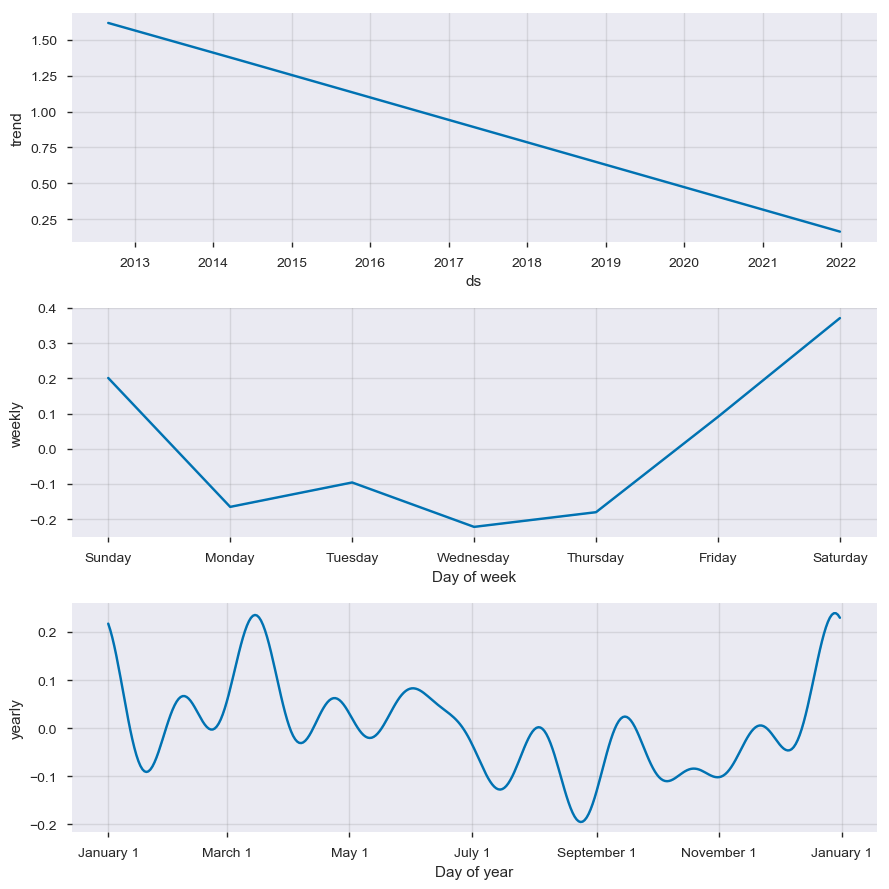

In [138]:
show222_prophet1.plot_components(show222_forecast1);


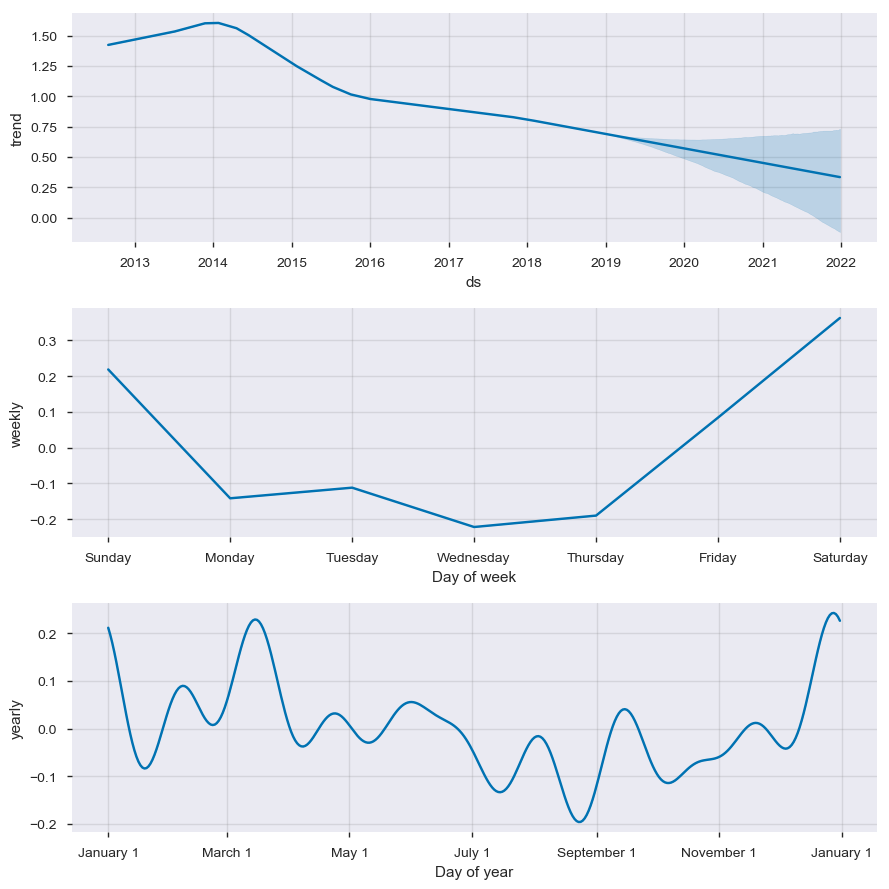

In [139]:
show222_prophet2.plot_components(show222_forecast2);

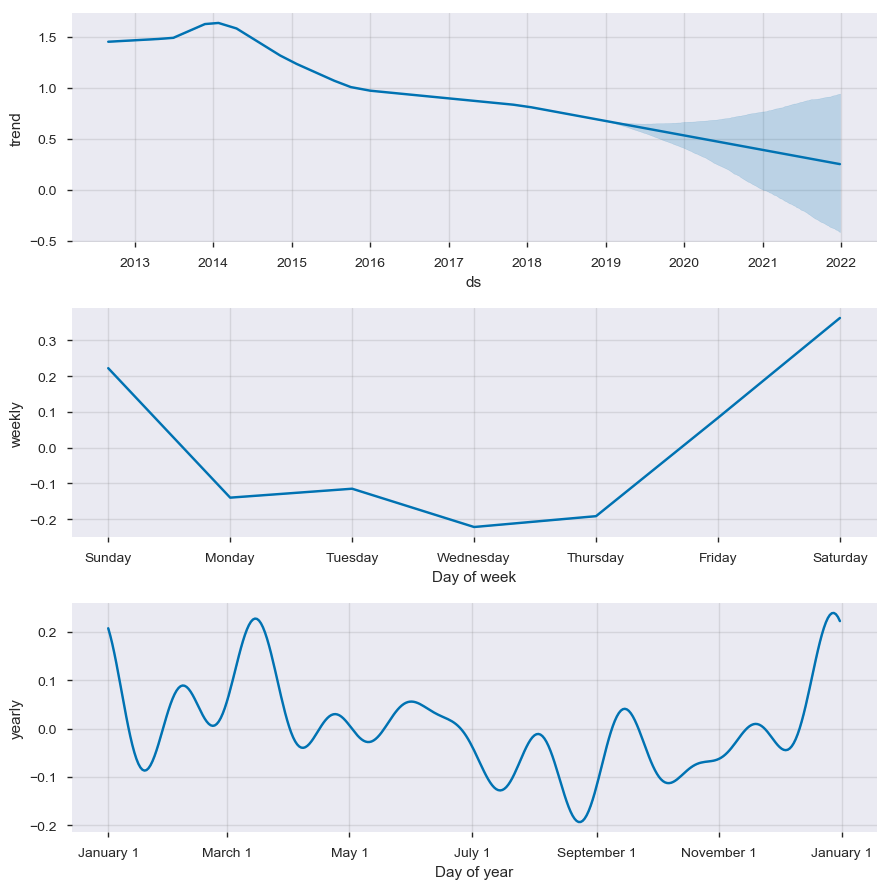

In [140]:
show222_prophet3.plot_components(show222_forecast3);

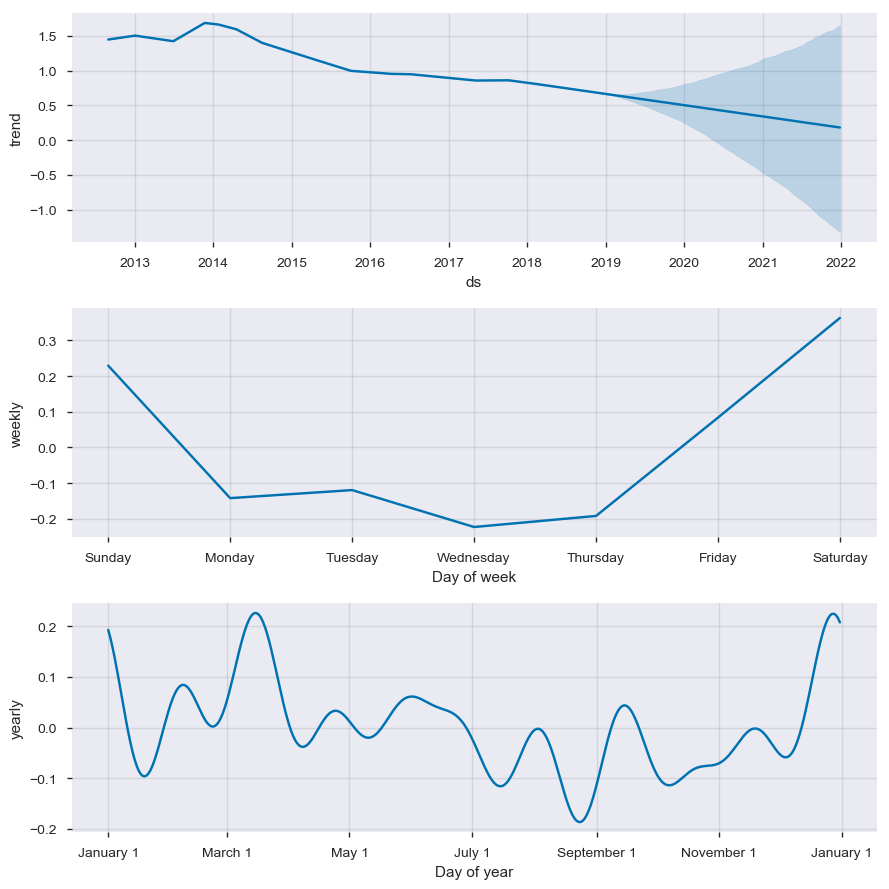

In [141]:
show222_prophet4.plot_components(show222_forecast4);

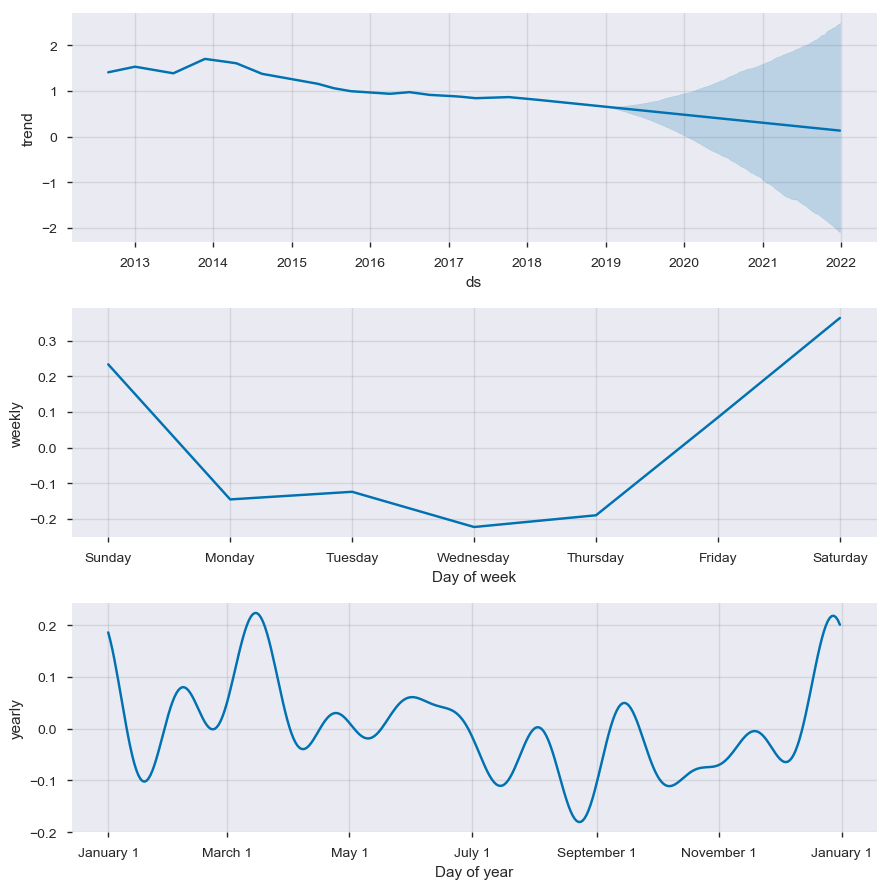

In [142]:
show222_prophet5.plot_components(show222_forecast5);

In [157]:
b = fp.Prophet()

In [159]:
show222_forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-30,1.422705,-0.055015,2.032227,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
1,2012-08-30,1.422705,0.070063,2.091845,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
2,2012-08-30,1.422705,0.096433,2.115244,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
3,2012-08-30,1.422705,0.096387,2.086915,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
4,2012-08-30,1.422705,0.010862,2.101531,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
5,2012-08-30,1.422705,-0.020546,2.095800,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
6,2012-08-30,1.422705,0.111277,2.040325,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
7,2012-08-30,1.422705,0.030064,2.160934,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
8,2012-08-30,1.422705,0.005190,2.109411,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
9,2012-08-30,1.422705,0.054009,2.147944,1.422705,1.422705,-0.335051,-0.335051,-0.335051,-0.189853,-0.189853,-0.189853,-0.145198,-0.145198,-0.145198,0.0,0.0,0.0,1.087654
